# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [76]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'


lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
country = []
date = []


query_string = f'{url}&appid={api_key}&units={units}&q='

for x in range(len(cities)):
    print(f"Making request number: {[x]} for City: {cities[x]}")
    post_response = requests.get(query_string + cities[x]).json()
    #print(query_string + cities[x])
    if post_response['cod'] == '404':
        print('404: City not found in OpenWeatherMaps')
    
    try:
        lat.append(post_response['coord']['lat'])
        lon.append(post_response['coord']['lon'])
        max_temp.append(post_response['main']['temp_max'])
        humidity.append(post_response['main']['humidity'])
        cloudiness.append(post_response['clouds']['all'])
        wind_speed.append(post_response['wind']['speed'])
        city_name.append(post_response['name'])
        country.append(post_response['sys']['country'])
        date.append(post_response['dt'])
    except:
        print("")

print(f'Weather for {len(city_name)} cities found out of {len(cities)} queried')

Making request number: [0] for City: laibin
Making request number: [1] for City: constitucion
Making request number: [2] for City: nizhneyansk
404: City not found in OpenWeatherMaps

Making request number: [3] for City: pochutla
Making request number: [4] for City: tolaga bay
Making request number: [5] for City: port elizabeth
Making request number: [6] for City: makakilo city
Making request number: [7] for City: mataura
Making request number: [8] for City: bengkulu
404: City not found in OpenWeatherMaps

Making request number: [9] for City: bredasdorp
Making request number: [10] for City: lebu
Making request number: [11] for City: saskylakh
Making request number: [12] for City: jamestown
Making request number: [13] for City: grand river south east
404: City not found in OpenWeatherMaps

Making request number: [14] for City: hasaki
Making request number: [15] for City: albany
Making request number: [16] for City: belushya guba
404: City not found in OpenWeatherMaps

Making request numb

Making request number: [160] for City: bathsheba
Making request number: [161] for City: buala
Making request number: [162] for City: antalaha
Making request number: [163] for City: camana
404: City not found in OpenWeatherMaps

Making request number: [164] for City: samusu
404: City not found in OpenWeatherMaps

Making request number: [165] for City: luderitz
Making request number: [166] for City: nyurba
Making request number: [167] for City: fagernes
Making request number: [168] for City: kibakwe
Making request number: [169] for City: naze
Making request number: [170] for City: clarence town
Making request number: [171] for City: port moresby
Making request number: [172] for City: whitehorse
Making request number: [173] for City: clyde river
Making request number: [174] for City: pastavy
Making request number: [175] for City: onega
Making request number: [176] for City: florence
Making request number: [177] for City: portland
Making request number: [178] for City: cidreira
Making requ

Making request number: [322] for City: aquiraz
Making request number: [323] for City: pascagoula
Making request number: [324] for City: virginia beach
Making request number: [325] for City: acapulco
Making request number: [326] for City: dubuque
Making request number: [327] for City: aitape
Making request number: [328] for City: castro
Making request number: [329] for City: asau
404: City not found in OpenWeatherMaps

Making request number: [330] for City: vaitupu
404: City not found in OpenWeatherMaps

Making request number: [331] for City: mahebourg
Making request number: [332] for City: le port
Making request number: [333] for City: mangaratiba
Making request number: [334] for City: padang
Making request number: [335] for City: papantla
404: City not found in OpenWeatherMaps

Making request number: [336] for City: merauke
Making request number: [337] for City: kupang
Making request number: [338] for City: port-cartier
Making request number: [339] for City: micheweni
Making request n

Making request number: [481] for City: teacapan
Making request number: [482] for City: iquitos
Making request number: [483] for City: robe
Making request number: [484] for City: hofn
Making request number: [485] for City: zhangjiakou
Making request number: [486] for City: richards bay
Making request number: [487] for City: fallon
Making request number: [488] for City: kamojima
Making request number: [489] for City: anloga
Making request number: [490] for City: akyab
404: City not found in OpenWeatherMaps

Making request number: [491] for City: port-gentil
Making request number: [492] for City: dodoma
Making request number: [493] for City: amderma
404: City not found in OpenWeatherMaps

Making request number: [494] for City: mbanza-ngungu
Making request number: [495] for City: krasnyy chikoy
Making request number: [496] for City: san jose de las lajas
Making request number: [497] for City: kavaratti
Making request number: [498] for City: lingdong
Making request number: [499] for City: s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [77]:
response_dict = {'City': city_name,
                 'Country': country,
                 'Lat': lat,
                 'Lon': lon,
                 'Max Temp': max_temp,
                 'Humidity': humidity,
                 'Cloudiness': cloudiness,
                 'Wind Speed': wind_speed, 
                 'Datetime Recorded UTC': date
                }

df = pd.DataFrame(response_dict)
df['Cloudiness'] = df['Cloudiness'] / 100
df['Datetime Recorded UTC'] = pd.to_datetime(df['Datetime Recorded UTC'], unit='s')
df.to_csv(output_data_file)
df.head()

,City,Country,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Datetime Recorded UTC
0,Laibin,CN,23.74,109.23,79.25,58,0.0,4.97,2019-10-21 03:39:32
1,Constitucion,MX,23.99,-104.67,66.20,88,0.9,8.05,2019-10-21 03:39:32
2,Pochutla,MX,15.74,-96.47,80.60,83,0.4,8.05,2019-10-21 03:39:33
3,Tolaga Bay,NZ,-38.37,178.30,64.50,46,0.0,12.48,2019-10-21 03:39:33
4,Port Elizabeth,US,39.31,-74.98,57.00,93,0.9,16.11,2019-10-21 03:39:33


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

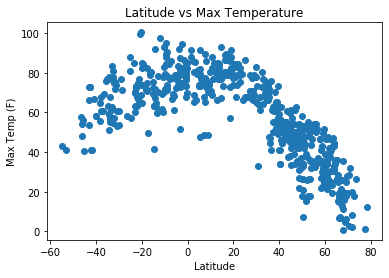

In [82]:
plt.scatter(df['Lat'], df['Max Temp'])
plt.title('Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.savefig('output_data/temperature_plot.png')


#### Latitude vs. Humidity Plot

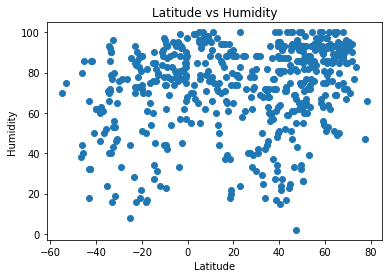

In [79]:
plt.scatter(df.Lat, df.Humidity)
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('output_data/humidity_plot.png')

#### Latitude vs. Cloudiness Plot

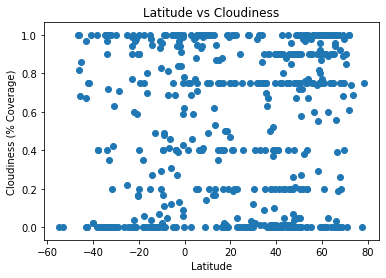

In [80]:
plt.scatter(df.Lat, df.Cloudiness)
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (% Coverage)')
plt.savefig('output_data/cloudiness_plot.png')

#### Latitude vs. Wind Speed Plot

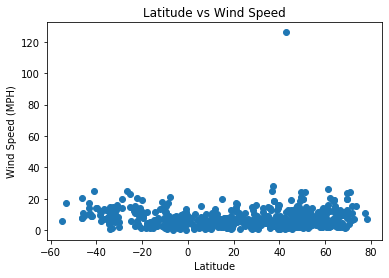

In [87]:
plt.scatter(df.Lat, df['Wind Speed'])
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.savefig('output_data/windspeed_plot.png')
#plt.ylim(0,40)

### Observations

* From the Latitude vs Max Temperature plot it appears that temperatures drop as we move from 0 toward 90. 90 deg latitude represents the north pole. It also apears from our random sample that temperatures drop lower toward the north pole (away from the equator) than they do toward the south pole (-90). This is likely due to the time of year we are in now, where the southern hemisphere has it's spring while we have our fall (us here in the north). Colder on average in the north because of earth's position relative to the sun this time of year.


* The Latitude vs Humidity plot shows less of a linear relationship, but there appears to be a tighter grouping at the higher latitudes and higher humidities. Again, this is likely a seasonal effect.


* Latitude vs Cloudiness doesn't appear to have a stong relationship, but there are some interesting horizontal linear-looking groupings near 0%, 20%, 40%, 70%, 100% coverage. This could be a measurement effect. it seems difficult to make an accurate measurement of the percentage of sky that is covered by clouds at any given time with a single point measurement tool.


* Latitude vs Wind Speed in miles/hour shows that w/ this unit of measurement, latitude doesn't have an effect on wind speed. It might be more interesting to plot this with different units, like meters/second, or change the ylim to a smaller range. Even when I tried that, I couldn't make out a clear relationship. It is Interesting to see the one outlier where it is very windy somewhere along the 40th parallel. Probably a big storm.